In [2]:
import pandas as pd
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ML Project/continuous_factory_process.csv'
df = pd.read_csv(file_path)

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute summary statistics
summary_stats = numeric_df.describe().T  # Transpose for better readability
summary_stats["median"] = numeric_df.median()  # Add median column

# Reorder columns
summary_stats = summary_stats[["mean", "median", "std", "min", "max"]]

# Display summary statistics
print(summary_stats)

# Save to CSV (optional)
summary_stats.to_csv("summary_statistics.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                     mean  median  \
AmbientConditions.AmbientHumidity.U.Actual      15.330759   15.12   
AmbientConditions.AmbientTemperature.U.Actual   23.843635   23.93   
Machine1.RawMaterial.Property1                  11.851256   11.54   
Machine1.RawMaterial.Property2                 205.676320  200.00   
Machine1.RawMaterial.Property3                 951.679815  963.00   
...                                                   ...     ...   
Stage2.Output.Measurement12.U.Setpoint           1.850000    1.85   
Stage2.Output.Measurement13.U.Actual             3.535251    3.51   
Stage2.Output.Measurement13.U.Setpoint           2.890000    2.89   
Stage2.Output.Measurement14.U.Actual             7.515574    7.87   
Stage2.Output.Measurement14.U.Setpoint          11.710000   11.71   

                                          

In [3]:
## Look for missing data

# Load your dataset
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine results into a DataFrame for easy viewing
missing_data_report = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})

# Display only features with missing values
print(missing_data_report[missing_data_report["Missing Values"] > 0])

# Check for empty strings
empty_string_counts = (df == "").sum()

# Check for placeholder missing values (-999, 9999, etc.)
placeholder_counts = (df.isin([-999, 9999, "N/A", "null", "None"])).sum()

print("Empty String Counts:")
print(empty_string_counts[empty_string_counts > 0])

print("\nPlaceholder Missing Value Counts:")
print(placeholder_counts[placeholder_counts > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
Empty String Counts:
Series([], dtype: int64)

Placeholder Missing Value Counts:
Series([], dtype: int64)


In [4]:
# Check for unexpeted data types
# Display data types
print(df.dtypes)

# Check if numeric columns contain unexpected text
for col in df.select_dtypes(include=["number"]).columns:
    non_numeric_values = df[col].apply(lambda x: isinstance(x, str)).sum()
    if non_numeric_values > 0:
        print(f"Column '{col}' has {non_numeric_values} non-numeric values.")


time_stamp                                        object
AmbientConditions.AmbientHumidity.U.Actual       float64
AmbientConditions.AmbientTemperature.U.Actual    float64
Machine1.RawMaterial.Property1                   float64
Machine1.RawMaterial.Property2                     int64
                                                  ...   
Stage2.Output.Measurement12.U.Setpoint           float64
Stage2.Output.Measurement13.U.Actual             float64
Stage2.Output.Measurement13.U.Setpoint           float64
Stage2.Output.Measurement14.U.Actual             float64
Stage2.Output.Measurement14.U.Setpoint           float64
Length: 116, dtype: object


In [5]:
# Look for outliers
import numpy as np
df = pd.read_csv(file_path, header=0,  usecols=lambda column: column != df.columns[0])

# Compute IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find potential outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Potential outliers in dataset:")
print(outliers[outliers > 0])


Potential outliers in dataset:
Machine1.RawMaterial.Property2                  3112
Machine1.RawMaterial.Property3                  1541
Machine1.RawMaterialFeederParameter.U.Actual    1984
Machine1.Zone1Temperature.C.Actual              1875
Machine1.MotorAmperage.U.Actual                  920
                                                ... 
Stage2.Output.Measurement10.U.Actual             835
Stage2.Output.Measurement11.U.Actual             777
Stage2.Output.Measurement12.U.Actual             903
Stage2.Output.Measurement13.U.Actual             406
Stage2.Output.Measurement14.U.Actual            1664
Length: 84, dtype: int64


In [9]:
# PCA

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the independent variables (columns 0 to 41)
independent_variables = df.iloc[:, :42]  # Columns 0 to 41 are the independent variables

# Select the primary output features (columns 42 to 71)
primary_features = df.iloc[:, 42:72]  # Columns 42 to 71 are the primary output features

# Standardize the independent variables
scaler = StandardScaler()
scaled_independent_vars = scaler.fit_transform(independent_variables)

# Perform PCA on the independent variables (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_independent_vars)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])

# Concatenate PCA results with the primary output features
df_pca = pd.concat([primary_features, pca_df], axis=1)



print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2f}")


Variance explained by PC1: 0.30
Variance explained by PC2: 0.13


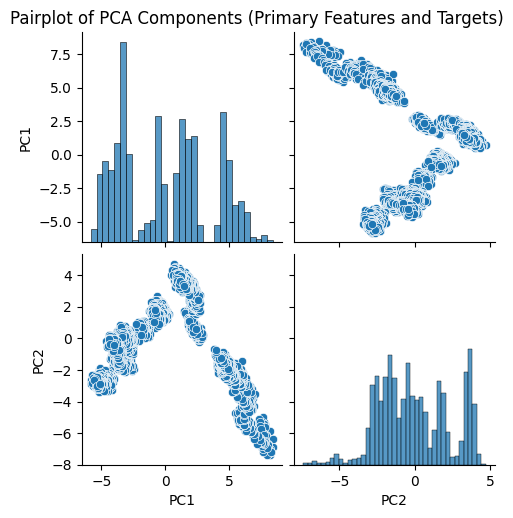

In [12]:

# Create a pairplot of the PCA components
sns.pairplot(pca_df)

# Set title after the pairplot to avoid weird positioning
plt.suptitle("Pairplot of PCA Components (Primary Features and Targets)", y=1.02)  # Adjust y for title positioning
plt.show()
